### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df1=df['Close']

In [6]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

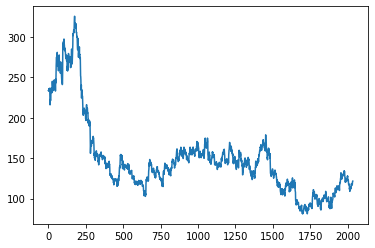

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [9]:
import numpy as np

In [10]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(1322, 713)

In [15]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 22s 619ms/step - loss: 0.0328 - val_loss: 0.0028
Epoch 2/100
20/20 [==============================] - 10s 514ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 3/100
20/20 [==============================] - 8s 376ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 4/100
20/20 [==============================] - 7s 329ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 4s 194ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 4s 193ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 7/100
20/20 [==============================] - 4s 192ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/100
20/20 [==============================] - 4s 192ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/100
20/20 [==============================] - 4s 191ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/100
20/20 [==============================] - 4s 194ms/step - loss: 0.0012 - val_

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.8.0'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

165.814725197086

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

116.18224638450766

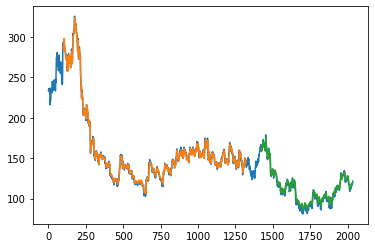

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

713

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 372)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238,
 0.03206699346405223,
 0.02696078431372545,
 0.035743464052287566,
 0.03594771241830064,
 0.0404411764705882,
 0.039215686274509776,
 0.044117647058823484,
 0.029820261437908446,
 0.012254901960784326,
 0.012867647058823484,
 0.011437908496731986,
 0.0024509803921567985,
 0.005923202614379064,
 0.0,
 0.007148692810457491,
 0.0042892156862744946,
 0.006740196078431349,
 0.006331699346405206,
 0.011233660130718914,
 0.019607843137254888,
 0.02757352941176472,
 0.030024509803921

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
import matplotlib.pyplot as plt

In [40]:
len(df1)

2035

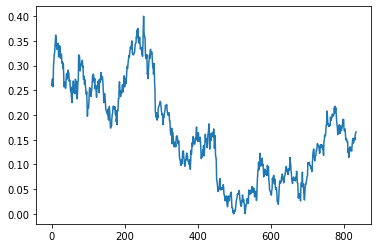

In [42]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [43]:
df3=scaler.inverse_transform(df3).tolist()

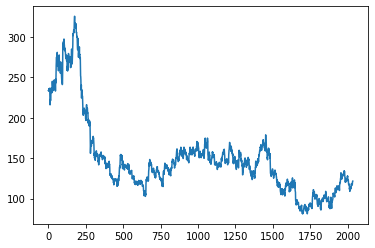

In [44]:
plt.plot(df3)